# Equity Data Science Educational Series

### Monthly Data Science Lecture Series Part 1:
### An Introduction to Decision Trees, Random Forests, and Gradient Boosting Machines

All examples from today's EDS educational session are included within this Jupyter Notebook. For those new to Jupyter Notebooks, code blocks can be executed by selecting the desired cell and pressing 'shift+enter', or clicking the 'play' button that appears at the upper left of the block.

The ouput from executing the code contained within the cell will then appear immediately below the executed cell. Give the simple example below a try:

In [2]:
print("Jupyter Test - Welcome to the EDS Educational Series on Wednesday, August", 2**5-10)

Jupyter Test - Welcome to the EDS Educational Series on Wednesday, August 22


*Before we begin, please take a moment to install a visualization engine by executing the below cell:*

In [3]:
!pip install graphviz 
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.38.0-16ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


# 1. Introduction

### The following topics will be discussed during today's session:

    > Decision Tree Modeling
        > Decision Tree Classification
        > Decision Tree Regression
    > Decision Tree Ensemble Methods
        > Random Forest
        > Gradient Boosting Machines

Code examples for today's session will utilize a dataset of median home prices across neighborhoods in the Boston Metropolitan area that is a common benchmark for algorithms in the machine learning community. Let's take a look at the data:

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

# load dataset
boston = load_boston()
housing = pd.DataFrame(boston.data)
housing['Median_Val'] = boston.target
housing.columns = ['Crime_Rate', 'Prop_Zoned', 'Prop_NonRetail', 'Borders_River',
                   'Conc_NO2', 'Avg_Rooms','Prop_Pre1940', 'Dist_Employ', 
                   'Hway_Access', 'Property_Tax', 'TeachStu_Ratio', 'B', 
                   'LSTAT', 'Median_Val']

# Dropping a few columns to reduce dimensions
drop_cols = ['B', 'LSTAT', 'Property_Tax']
housing = housing[[a_col for a_col in housing.columns if not a_col in drop_cols]]

# Print first 10 rows of the housing data set
housing.head(10)


,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,18.7,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,15.2,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,15.2,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,15.2,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,18.9


In order to also utilize the housing data to explore the application of decision trees to classification problems, we will add a categorical target that splits the median value into terciles for use in our decision tree classifiers:



In [5]:
# create categorical version of response variable [0 = lowest, 1 = middle, 2 = high]
housing['Val_Cat'] = pd.qcut(housing.Median_Val,3,labels = [0,1,2])
housing.head(10)

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val,Val_Cat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,24.0,2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,34.7,2
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,33.4,2
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,36.2,2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,18.7,28.7,2
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,15.2,22.9,1
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,15.2,27.1,2
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,15.2,16.5,0
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,15.2,18.9,1


As our objective is to build a predictive model that will work out of sample, let's split the dataset into a training, validation, and test set to gauge predictive accuracy.

In [0]:
# summary statistics for variables
from sklearn.model_selection import train_test_split

# split data into two groups: 80% train + validation, 20% test
housing_train, housing_test = train_test_split(housing, test_size = 0.2, random_state = 1991)

# split train data into two further groups (train + validation)
housing_train, housing_valid = train_test_split(housing_train, test_size = 0.2, random_state = 1991)

In [7]:
# We now have three data sets, 323 training data points, 81 validation data points, and 102 test data points
print("Training Data: Number of Rows, Number of Columns:", housing_train.shape)
print("Validation Data: Number of Rows, Number of Columns:",housing_valid.shape)
print("Testing Data: Number of Rows, Number of Columns:",housing_test.shape)

Training Data: Number of Rows, Number of Columns: (323, 12)
Validation Data: Number of Rows, Number of Columns: (81, 12)
Testing Data: Number of Rows, Number of Columns: (102, 12)


Let's take a quick peak at the summary statistics and correlations among variables in the training data:

In [8]:
# display summary statistics for training data
housing_train.describe()

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
count,323.000000,323.00000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,3.684526,11.28483,10.976192,0.058824,0.551798,6.302260,69.454799,3.773225,9.102167,18.498762,23.016718
std,9.007261,23.55938,7.029174,0.235659,0.110495,0.742605,27.476607,2.102102,8.547934,2.204526,9.684865
min,0.006320,0.00000,0.740000,0.000000,0.389000,3.561000,6.000000,1.129600,1.000000,12.600000,5.000000
25%,0.078910,0.00000,4.950000,0.000000,0.451000,5.884500,45.800000,2.103450,4.000000,17.400000,17.150000
50%,0.222120,0.00000,8.560000,0.000000,0.538000,6.195000,77.000000,3.092300,5.000000,19.100000,21.200000
75%,2.542505,12.50000,18.100000,0.000000,0.624000,6.635000,94.750000,5.108550,8.000000,20.200000,26.900000
max,88.976200,100.00000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,22.000000,50.000000


In [9]:
# correlation matrix of variables
import seaborn as sborn
color_map= sborn.diverging_palette(5, 250, as_cmap=True)
feature_cor = housing_train.corr()
feature_cor.style.background_gradient(color_map, axis = 1)

,Crime_Rate,Prop_Zoned,Prop_NonRetail,Borders_River,Conc_NO2,Avg_Rooms,Prop_Pre1940,Dist_Employ,Hway_Access,TeachStu_Ratio,Median_Val
Crime_Rate,1,-0.191686,0.394611,-0.0533253,0.44593,-0.231909,0.340748,-0.374461,0.644814,0.272797,-0.387143
Prop_Zoned,-0.191686,1,-0.513589,-0.0360297,-0.503668,0.320949,-0.56226,0.626323,-0.298014,-0.390416,0.359773
Prop_NonRetail,0.394611,-0.513589,1,0.0363193,0.740753,-0.425986,0.639273,-0.692064,0.56267,0.40279,-0.488927
Borders_River,-0.0533253,-0.0360297,0.0363193,1,0.0504172,0.0729196,0.101612,-0.0803717,-0.0261181,-0.166043,0.205035
Conc_NO2,0.44593,-0.503668,0.740753,0.0504172,1,-0.319511,0.742748,-0.776038,0.617955,0.167138,-0.41802
Avg_Rooms,-0.231909,0.320949,-0.425986,0.0729196,-0.319511,1,-0.246268,0.212852,-0.25596,-0.411455,0.70709
Prop_Pre1940,0.340748,-0.56226,0.639273,0.101612,0.742748,-0.246268,1,-0.744433,0.445903,0.237972,-0.364776
Dist_Employ,-0.374461,0.626323,-0.692064,-0.0803717,-0.776038,0.212852,-0.744433,1,-0.481763,-0.20332,0.228815
Hway_Access,0.644814,-0.298014,0.56267,-0.0261181,0.617955,-0.25596,0.445903,-0.481763,1,0.426552,-0.365603
TeachStu_Ratio,0.272797,-0.390416,0.40279,-0.166043,0.167138,-0.411455,0.237972,-0.20332,0.426552,1,-0.522343


Before beginning any predictive modeling exercise, it is useful to:

    > Establish Measure of Model Performance
      > Mean Squared Error
    > Generate Lazy Performance Baseline
      > Average Value



In [0]:
# function to compute mean squared error
def mean_squared_error(predicted_values, actual_values):
    return np.mean((predicted_values - actual_values) ** 2)

# 2. Decision Tree Modeling

Decision trees are a class of nonpametric models that partition datasets into sub-regions.

In predictive modeling tasks, predictions for new observations are generated by following the rules of the tree from root to leaf.

Let's take a look at a quick example:

In [0]:
# import decision tree building functions and visualization functions from sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import tree
from IPython.display import display, SVG
from graphviz import Source

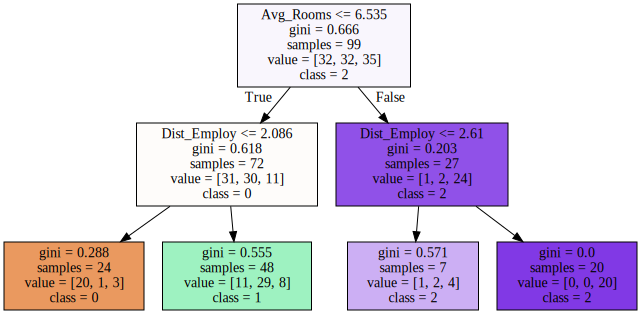

In [12]:
# fit a basic decision tree classifier on the training data
import os

ind_vars =['Avg_Rooms', 'Dist_Employ']
classifier = DecisionTreeClassifier(max_depth = 2)
classifier.fit(housing_train.head(99)[ind_vars], housing_train.head(99).Val_Cat)

# Plot the tree
tree_plot = Source(tree.export_graphviz(classifier, out_file = None, 
                        feature_names = ind_vars, class_names = ['0', '1', '2'],
                        filled = True))
display(SVG(tree_plot.pipe(format = 'svg')))

Text(0,0.5,'Distance to Employment')

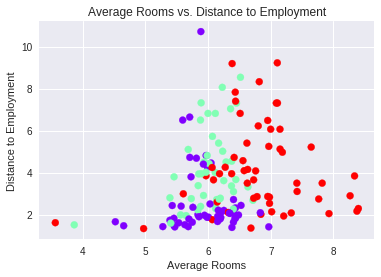

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

# subset of the training data to make visualization more manageable
train_sub1 = housing_train.sample(n=150, random_state=1991, replace=False)
train_sub1_x = train_sub1[['Avg_Rooms', 'Dist_Employ']]
train_sub1_y = train_sub1.Val_Cat
plt.scatter(train_sub1_x.Avg_Rooms, train_sub1_x.Dist_Employ, c=train_sub1_y, cmap = 'rainbow')
plt.title('Average Rooms vs. Distance to Employment')
plt.xlabel('Average Rooms')
plt.ylabel('Distance to Employment')

In [0]:
def plot_tree(max_depth, min_leaf = 0.2):
    estimator = DecisionTreeClassifier(random_state = 1991,
                                      max_depth = max_depth,
                                      min_samples_leaf = min_leaf)
    estimator = estimator.fit(train_sub2_x,train_sub2_y)
    
    graph = Source(tree.export_graphviz(estimator, out_file = None, feature_names = train_sub2_x.columns, 
                                       class_names = ['0', '1', '2'],
                                       filled = True))
    #plot_tree_boundaries(max_depth, train_sub2_x, train_sub2_y)
    display(SVG(graph.pipe(format = 'svg')))
    

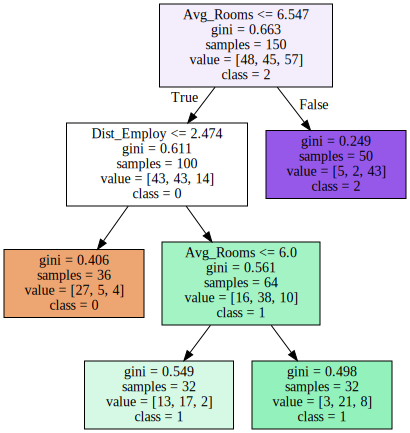

In [77]:
#@title Try changing the tree tuning parameters. { run: "auto" }
max_depth = 5 #@param {type:"slider", min:1, max:10, step:1}
min_leaf = 0.21 #@param {type:"slider", min:0.01, max:1, step:0.05}

plot_tree(max_depth, min_leaf)


In [0]:
def plot_tree_boundaries(max_depth, data_x, data_y, par = None, cmap = 'rainbow'):
    if par is None:
        par = plt.gca()
        
    # plot the training points
    par.scatter(data_x.values[:,0], data_x.values[:,1], c = data_y, s = 50, cmap = cmap, clim = (data_y.min(), data_y.max()), zorder = 3)
    par.axis('tight')
    par.axis('off')
    lim_x = par.get_xlim()
    lim_y = par.get_ylim()
    
    classifier = DecisionTreeClassifier(max_depth = max_depth)
    classifier.fit(data_x, data_y)
    mesh_x, mesh_y = np.meshgrid(np.linspace(*lim_x, num = 200), np.linspace(*lim_y, num = 200))
    mesh_preds = classifier.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()]).reshape(mesh_x.shape)
    
    n_class = len(np.unique(data_y))
    mesh_colors = par.contourf(mesh_x, mesh_y, mesh_preds, alpha = 0.3, levels = np.arange(n_class + 1)-0.5, 
                               cmap=cmap, clim = (data_y.min(), data_y.max()), zorder = 1)
    
    par.set(xlim = lim_x, ylim = lim_y)
    

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


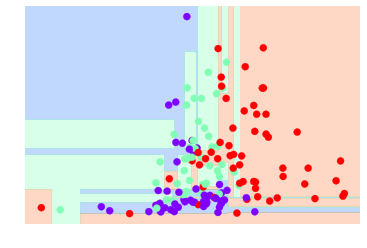

In [57]:
plot_tree_boundaries(8, train_sub1_x, train_sub1_y)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


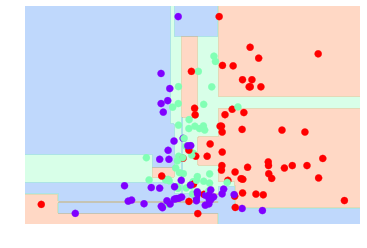

In [16]:
# subset of the training data to make visualization more manageable
train_sub2 = housing_train.sample(n=150, random_state=1992, replace=False)
train_sub2_x = train_sub2[['Avg_Rooms', 'Dist_Employ']]
train_sub2_y = train_sub2.Val_Cat
plot_tree_boundaries(8, train_sub2_x, train_sub2_y)

# 3. Decision Tree Ensemble Methods

## Random Forests

In [0]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [0]:
def plot_random_forest(n_estimators=1):
            
    data_x = train_sub2_x
    data_y = train_sub2_y
    par = None
    cmap = 'rainbow'
    max_depth = 1
    min_leaf = 0.2
    
    if par is None:
        par = plt.gca()

    par.scatter(data_x.values[:,0], data_x.values[:,1], c = data_y, s = 50, cmap = cmap, clim = (data_y.min(), data_y.max()), zorder = 3)
    par.axis('tight')
    par.axis('off')
    lim_x = par.get_xlim()
    lim_y = par.get_ylim()
    
    rf_estimator = RandomForestClassifier(random_state = 1991,
                                      n_estimators = n_estimators,
                                      min_samples_leaf =2)
    rf_estimator.fit(train_sub2_x,train_sub2_y)
    
    mesh_x, mesh_y = np.meshgrid(np.linspace(*lim_x, num = 200), np.linspace(*lim_y, num = 200))
    mesh_preds = rf_estimator.predict(np.c_[mesh_x.ravel(), mesh_y.ravel()]).reshape(mesh_x.shape)
    
    n_class = len(np.unique(data_y))
    mesh_colors = par.contourf(mesh_x, mesh_y, mesh_preds, alpha = 0.3, levels = np.arange(n_class + 1)-0.5, 
                               cmap=cmap, zorder = 1)
    
    par.set(xlim = lim_x, ylim = lim_y)    
    


Filler text

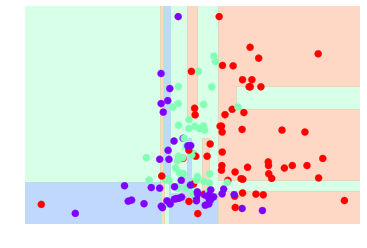

In [21]:
#@title Watch how the decision surface changes as we add more trees. { run: "auto" }
n_estimators = 1 #@param {type:"slider", min:1, max:100, step:1}
plot_random_forest(n_estimators)

## Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


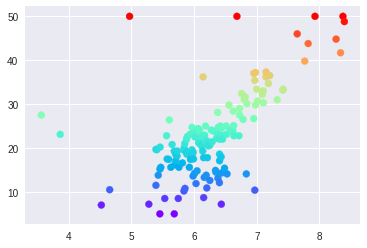

In [23]:
%matplotlib inline
from matplotlib import pyplot as plt

# subset of the training data to make visualization more manageable
boosting_subset = housing_train.sample(n=150, random_state=1991, replace=False)
boosting_subset = boosting_subset.sort_values('Avg_Rooms')
boosting_subset_x = boosting_subset['Avg_Rooms']
boosting_subset_y = boosting_subset['Median_Val']
plt.scatter(boosting_subset_x, boosting_subset_y, c=boosting_subset_y, cmap = 'rainbow')

In [0]:
train_error = np.empty(100) * np.nan
valid_error = np.empty(100) * np.nan



In [0]:
def plot_gradient_boosting(num_trees=1, learn_rate = 0.30):
    
    data_x = boosting_subset_x.values.reshape(-1, 1)
    data_y = boosting_subset_y
    cmap = 'rainbow'

    gradient_boosting_estimator = GradientBoostingRegressor(random_state = 1991,
                                      n_estimators = num_trees,
                                      learning_rate = learn_rate,
                                      min_samples_leaf = 2,
                                      max_depth = 1)
    gradient_boosting_estimator = gradient_boosting_estimator.fit(data_x, data_y)

    gradient_boosting_predictions = gradient_boosting_estimator.predict(data_x)
    gradient_boosting_residuals = data_y - gradient_boosting_predictions
    
    # generate predictions on validation dataset
    validation_predictions = gradient_boosting_estimator.predict(housing_valid['Avg_Rooms'].values.reshape(-1,1))
    train_mse = mean_squared_error(boosting_subset_y, gradient_boosting_predictions)
    valid_mse = mean_squared_error(housing_valid['Median_Val'].values, validation_predictions)
    train_error[num_trees-1] = train_mse
    valid_error[num_trees-1] = valid_mse
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (20,5))
    ax1.scatter(data_x, gradient_boosting_predictions, c = gradient_boosting_predictions, s = 50, cmap = cmap)
    ax1.set_title('Gradient Boosting Predicted Values - ' +  str(num_trees) + ' iteration(s)')
    ax1.axis((3.5,8.5,0,55))
    ax2.scatter(data_x, gradient_boosting_residuals, c = np.abs(gradient_boosting_residuals), s = 50, cmap = cmap)
    ax2.set_title('Gradient Boosting Residuals - ' +  str(num_trees) + ' iteration(s)')
    ax2.axis((3.5,8.5,-30,30))
    ax3.plot(range(0,num_trees), train_error[0:num_trees], label = 'train')
    ax3.plot(range(0,num_trees), valid_error[0:num_trees], label = 'valid')
    ax3.set_title('Gradient Boosting Validation Error - ' + str(num_trees) + ' iteration(s)')
    ax3.legend(loc = 'upper right')


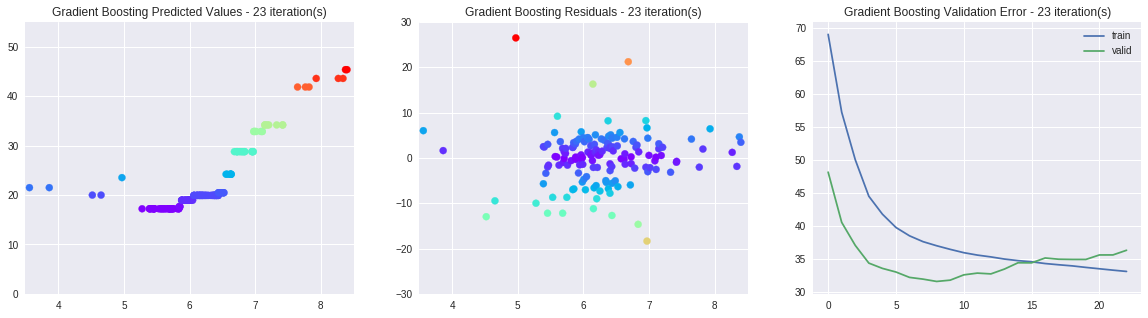

In [97]:
#@title Watch how the decision surface changes as we add more trees. { run: "auto" }
num_trees = 23 #@param {type:"slider", min:1, max:100, step:1}
learn_rate = 0.3 #@param {type:"slider", min:0.01, max:1, step:0.01}

plot_gradient_boosting(num_trees, learn_rate)


In [27]:
print('Minimum error of ', np.nanmin(valid_error), ' reached after ', np.nanargmin(valid_error)+1, 'iterations')

Minimum error of  48.15377290040331  reached after  1 iterations


In [0]:
train_error = np.empty(100) * np.nan
valid_error = np.empty(100) * np.nan

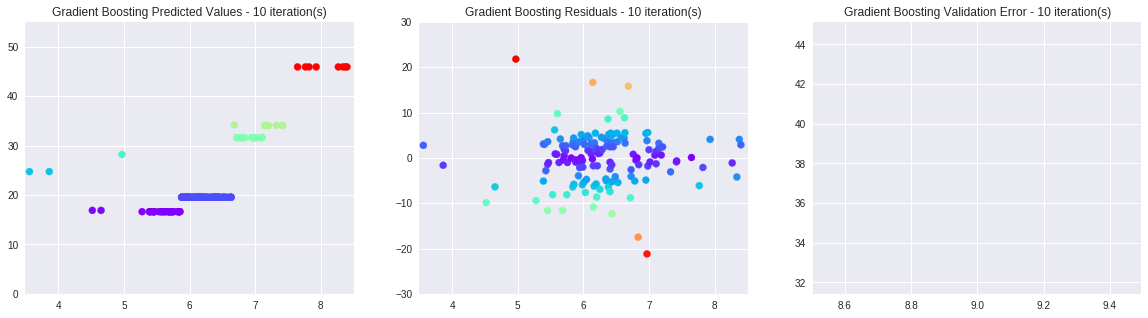

In [29]:
#@title Watch how the decision surface changes as we add more trees. { run: "auto" }
num_trees = 10 #@param {type:"slider", min:1, max:100, step:1}
learn_rate = 0.96 #@param {type:"slider", min:0.01, max:1, step:0.01}

plot_gradient_boosting(num_trees, learn_rate)

In [30]:
print('Minimum error of ', np.nanmin(valid_error), ' reached after ', np.nanargmin(valid_error)+1, 'iterations')

Minimum error of  44.5029156549128  reached after  10 iterations


In [0]:
train_error = np.empty(100) * np.nan
valid_error = np.empty(100) * np.nan

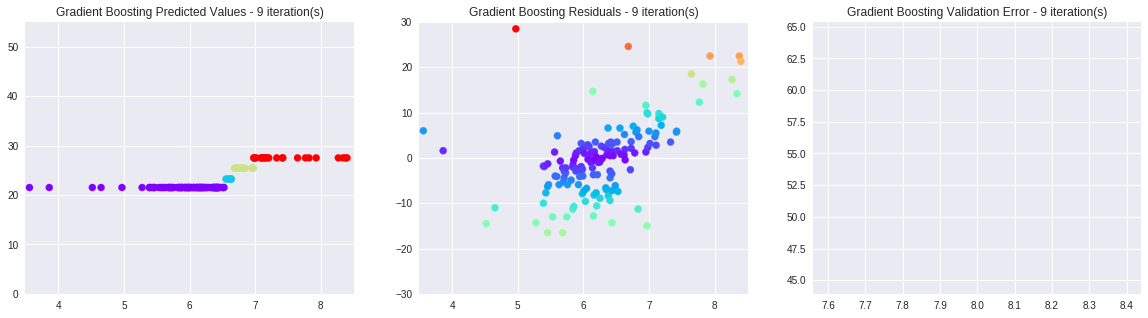

In [32]:
#@title Watch how the decision surface changes as we add more trees. { run: "auto" }
num_trees = 9 #@param {type:"slider", min:1, max:100, step:1}
learn_rate = 0.05 #@param {type:"slider", min:0.01, max:1, step:0.01}

plot_gradient_boosting(num_trees, learn_rate)

## Comparison of Model Performance


Now that the underlying model approaches have been introduced, we will now select the 'best' model by analyzing performance on the validation data set. This champion model will then be utilized to generate predictions on the unseen test data set for a more complete picture of 'out of sample' performance.

In [0]:
predictor_vars = ['Crime_Rate', 'Prop_Zoned', 'Prop_NonRetail', 'Borders_River',
                   'Conc_NO2', 'Avg_Rooms','Prop_Pre1940', 'Dist_Employ', 
                   'Hway_Access', 'TeachStu_Ratio']

In [34]:
# Test Decision Trees with Different Maximum Depths / Minimum Leaf Sizes

from itertools import product

maximum_tree_depths = [1,3,5,7,9]
minimum_tree_leaf_sizes = [1,5,10,15]

tree_results = pd.DataFrame(list(product(maximum_tree_depths, minimum_tree_leaf_sizes)), columns=['Max_Depth', 'Leaf_Size'])
tree_results['MSE'] = np.NAN

tree_results

,Max_Depth,Leaf_Size,MSE
0,1,1,NaN
1,1,5,NaN
2,1,10,NaN
3,1,15,NaN
4,3,1,NaN
5,3,5,NaN
6,3,10,NaN
7,3,15,NaN
8,5,1,NaN
9,5,5,NaN


In [35]:
for a_row in range(len(tree_results)):
  
  # build a decision tree
  decision_tree = DecisionTreeRegressor(max_depth = tree_results['Max_Depth'][a_row],
                                       min_samples_leaf = tree_results['Leaf_Size'][a_row],
                                       random_state = 1991)
  
  # fit the decision tree
  decision_tree = decision_tree.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  tree_predictions = decision_tree.predict(housing_valid[predictor_vars])
  # generate error
  tree_error = mean_squared_error(tree_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  tree_results.loc[a_row, 'MSE'] = tree_error
  
tree_results

,Max_Depth,Leaf_Size,MSE
0,1,1,36.727668
1,1,5,36.727668
2,1,10,36.727668
3,1,15,36.727668
4,3,1,22.714509
5,3,5,18.215527
6,3,10,19.115904
7,3,15,20.077613
8,5,1,20.667614
9,5,5,16.076140


In [0]:
# Test Random Forests with Different Maximum Depths / Minimum Leaf Sizes / Number of Trees

maximum_rf_depths = [5,1000]
minimum_rf_leaf_sizes = [1,5,10]
number_rf_trees = [50,100]

rf_results = pd.DataFrame(list(product(maximum_rf_depths, minimum_rf_leaf_sizes, number_rf_trees)), columns=['Max_Depth', 'Leaf_Size', 'Num_Trees'])
rf_results['MSE'] = np.NAN


In [37]:
for a_row in range(len(rf_results)):
  
  # build a random forest
  random_forest = RandomForestRegressor(max_depth = rf_results['Max_Depth'][a_row],
                                       min_samples_leaf = rf_results['Leaf_Size'][a_row],
                                       n_estimators = rf_results['Num_Trees'][a_row],
                                       random_state = 1991)
  
  # fit the random forest
  random_forest = random_forest.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  rf_predictions = random_forest.predict(housing_valid[predictor_vars])
  # generate error
  rf_error = mean_squared_error(rf_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  rf_results.loc[a_row, 'MSE'] = rf_error
  
rf_results

,Max_Depth,Leaf_Size,Num_Trees,MSE
0,5,1,50,15.997942
1,5,1,100,15.748370
2,5,5,50,17.048671
3,5,5,100,16.859586
4,5,10,50,17.159426
5,5,10,100,17.350800
6,1000,1,50,14.847628
7,1000,1,100,14.682771
8,1000,5,50,16.405488
9,1000,5,100,16.182311


In [0]:
# Test Gradient Boosting with Different Maximum Depths / Number of Trees / Learn Rates

maximum_gb_depths = [1,7]
number_gb_trees = [30,300]
gb_learn_rate = [.05,.3,]

gb_results = pd.DataFrame(list(product(maximum_gb_depths, number_gb_trees, gb_learn_rate)), columns=['Max_Depth', 'Num_Trees', 'Learn_Rate'])
gb_results['MSE'] = np.NAN



In [39]:
for a_row in range(len(gb_results)):
  
  # build a gradient booster
  gradient_boost = GradientBoostingRegressor(max_depth = gb_results['Max_Depth'][a_row],
                                       n_estimators = gb_results['Num_Trees'][a_row],
                                       learning_rate = gb_results['Learn_Rate'][a_row],
                                       min_samples_leaf = 5,
                                       random_state = 1991)
  
  # fit the gradient booster
  gradient_boost = gradient_boost.fit(housing_train[predictor_vars], housing_train['Median_Val'])
  # generate predictions
  gb_predictions = gradient_boost.predict(housing_valid[predictor_vars])
  # generate error
  gb_error = mean_squared_error(gb_predictions, housing_valid['Median_Val'])
  # fill in column in test results
  gb_results.loc[a_row, 'MSE'] = gb_error
  
gb_results

,Max_Depth,Num_Trees,Learn_Rate,MSE
0,1,30,0.05,27.064053
1,1,30,0.30,16.236521
2,1,300,0.05,17.032141
3,1,300,0.30,21.732335
4,7,30,0.05,15.390569
5,7,30,0.30,15.665989
6,7,300,0.05,14.566471
7,7,300,0.30,15.929351


We will now retrain each model type utilizing the optimal parameters identified in the validation procedure above. 

In [0]:

# decision tree
decision_tree = DecisionTreeRegressor(max_depth = 5,
                                     min_samples_leaf = 5,
                                     random_state = 1991)
decision_tree = decision_tree.fit(housing_train[predictor_vars], housing_train['Median_Val'])

# random forest
random_forest = RandomForestRegressor(max_depth = 1000,
                                     min_samples_leaf = 1,
                                     n_estimators = 100,
                                     random_state = 1991)
random_forest = random_forest.fit(housing_train[predictor_vars], housing_train['Median_Val'])

# gradient boosting
gradient_boost = GradientBoostingRegressor(max_depth = 7,
                                     n_estimators = 300,
                                     learning_rate = 0.05,
                                     random_state = 1991,
                                     min_samples_leaf = 5)

# fit the gradient booster
gradient_boost = gradient_boost.fit(housing_train[predictor_vars], housing_train['Median_Val'])

We now generate predictions (along with a simple 'average' baseline) to evaluate how well the 'best' models identified through the validation procedure perform on the unseen test data.

In [0]:

# simple average predictions
avg_predictions = [housing_train['Median_Val'].mean()] * len(housing_test)
# decision tree predictions
tree_predictions = decision_tree.predict(housing_test[predictor_vars])
# random forest predictions
rf_predictions = random_forest.predict(housing_test[predictor_vars])
# gradient boosting predictions
gb_predictions = gradient_boost.predict(housing_test[predictor_vars])


# errors across the models
avg_error = mean_squared_error(avg_predictions, housing_test['Median_Val'])
tree_error = mean_squared_error(tree_predictions, housing_test['Median_Val'])
rf_error = mean_squared_error(rf_predictions, housing_test['Median_Val'])
gb_error = mean_squared_error(gb_predictions, housing_test['Median_Val'])


In [42]:
print('Test Error Using Average from Training Set:', avg_error)
print('Test Error Using Decision Tree:',tree_error)
print('Test Error Using Random Forest:',rf_error)
print('Test Error Using Gradient Boosting:',gb_error)

Test Error Using Average from Training Set: 74.4672484799688
Test Error Using Decision Tree: 27.18435627078016
Test Error Using Random Forest: 16.243200313725488
Test Error Using Gradient Boosting: 14.854625691390016


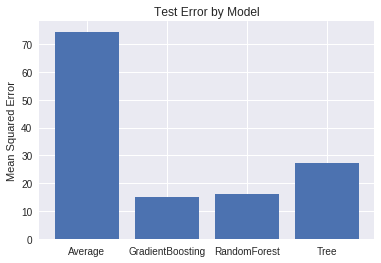

In [43]:
# Barplot
result_height = [avg_error, tree_error, rf_error, gb_error]
result_bars = ('Average', 'Tree', 'RandomForest', 'GradientBoosting')

# Create bars
plt.bar(result_bars, result_height)

# add in a title
plt.title('Test Error by Model' )
plt.ylabel('Mean Squared Error')

# Show graphic
plt.show()


## Extracting Insight from the Selected Model

Now that we have selected our champion model and confirmed its efficacy utilizing the out of sample test data, we will attempt to leverage additional tools to better understand the insights that drive its predictions.

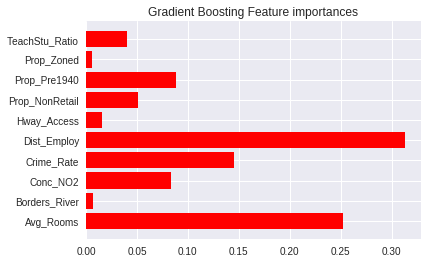

,Feature,Importance
7,Dist_Employ,0.313014
5,Avg_Rooms,0.252343
0,Crime_Rate,0.144770
6,Prop_Pre1940,0.088032
4,Conc_NO2,0.083221
2,Prop_NonRetail,0.050811
9,TeachStu_Ratio,0.040411
8,Hway_Access,0.015282
3,Borders_River,0.006388
1,Prop_Zoned,0.005728


In [44]:
# variable importances from model
gb_importances = gradient_boost.feature_importances_

# Plot the feature importances of the ensemble
plt.figure()
plt.title("Gradient Boosting Feature importances")
plt.barh(predictor_vars, gb_importances, color="r", align="center")

plt.show()

pd.DataFrame({'Feature' : predictor_vars, 'Importance': gb_importances}).sort_values("Importance", ascending = False)

Having identified the most important variables from the model, we can dig deeper into their marginal impacts and key interactions with other variables:

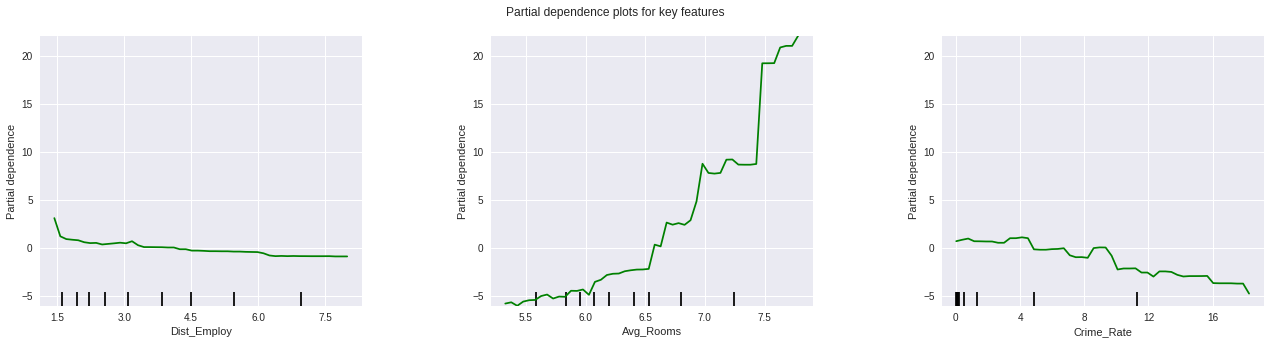

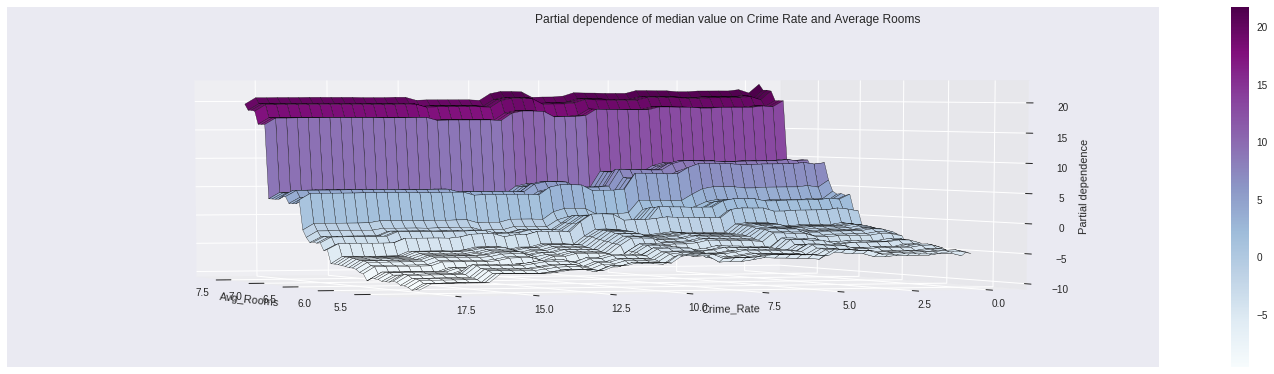

In [52]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from mpl_toolkits.mplot3d import Axes3D

names = predictor_vars
features = [7,5,0]
fig, axs = plot_partial_dependence(gradient_boost, housing_train[predictor_vars], features,
                                   feature_names=predictor_vars,
                                   n_jobs=1, grid_resolution=50,
                                  figsize = (20,5))
fig.suptitle('Partial dependence plots for key features')
plt.subplots_adjust(top=0.9) 
fig = plt.figure(figsize = (20,5))

target_feature = (5, 0)
pdp, axes = partial_dependence(gradient_boost, target_feature,
                               X=housing_train[predictor_vars], grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('Partial dependence')
ax.view_init(elev=3, azim=160)
plt.colorbar(surf)
plt.suptitle('Partial dependence of median value on Crime Rate and Average Rooms')
plt.subplots_adjust(top=0.9)

plt.show()